# Hello Machine Learning - Iris

This Show & Tell is to showcase how the datascience pipeline is applied to a very simply machine learning study.

## Introduction

For this Show & Tell, we are going to tackle a classification problem using the Iris dataset.

There are many recommended steps to approach a datascience project, however, we recommend the following steps as a guideline:

1. **Problem**:

   1.1. Statement
   
   1.2. Motivation
   
   1.3. Hypothesis
   
   1.4. Goal
   
2. **Data**:

   2.1. Accumulation
   
   2.2. Preparation
   
   2.3. Integration
   
   2.4. Aggregation
   
3. **Analysis**:

   3.1. Static
   
   3.2. Data Mining
  
4. **Modeling**:

   4.1. Data Pipeline
   
   4.2. Model building
   
   4.3. Training
   
   4.4. Validation
   
   4.5. Testing
   
5. **Insights**:
  
   5.1. Results
   
   5.2. Conclusions
   
6. **Presentation**:

   6.1. Visualisations
   
   6.2. Reporting

## Prerequisites


1. Make sure the notebook settings is set to use GPU Acceleration. This can be done by clicking Edit -> Notebook Settings -> Hardware accelerator -> GPU

![](https://i.imgur.com/4uG9vIn.png)

2. Install the necessary libraries below

* Matplotlib: Data visualisation
* Numpy: Arrays and vectors (data structuring)
* Pandas: Data loading and framing
* Seaborn: Advanced data visualisation
* Sklearn: Data mining and analysis (plus provides datasets)
* Tensorflow: Machine learning

In [4]:
!pip install -q google-colab
!pip install -q matplotlib
!pip install -q numpy
!pip install -q pandas
!pip install -q seaborn  
!pip install -q sklearn
!pip install -q tensorflow

3. Import the necessary libraries and packages

In [5]:
# Futures
from __future__ import absolute_import, division, print_function, unicode_literals

# Libraries
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as skl
import tensorflow as tf

# Specific modules
import matplotlib.pyplot as plt
from google.colab import auth
from sklearn.model_selection import train_test_split

# Version checks
print("Matplotlib version: {}".format(mpl.__version__))
print("Numpy version: {}".format(np.__version__))
print("Pandas version: {}".format(pd.__version__))
print("Seaborn version: {}".format(sns.__version__))
print("Sklearn version: {}".format(skl.__version__))
print("Tensorflow version: {}".format(tf.__version__))

Matplotlib version: 3.2.2
Numpy version: 1.19.5
Pandas version: 1.1.5
Seaborn version: 0.11.1
Sklearn version: 0.22.2.post1
Tensorflow version: 2.4.1


4. Load extensions

In [6]:
%load_ext google.colab.data_table

5. Authenticate with Google Cloud

In [ ]:
# auth.authenticate_user()
# print('Authenticated')

Authenticated


## Problem

### Problem Statement

Classifying the Iris flower according to different kinds of species is a timely and tedious process that often requires a skilled person to execute.

Here is a picture to illustrate the species and their features:

![](http://suruchifialoke.com/img/ML/iris.png)

### Motivation

We are given a task to classify Iris flowers on an Iris flower farm. There are too many flowers to classify by hand. 
By utilising a machine learning approach, we can greatly increase the efficiency and accuracy with which we classify these flowers. If we can classify these flowers faster and more accurately, we can cost the project at a lower rate, giving us a competitive advantage above our competition.

### Hypothesis

* **h0:** We would not be able to predict the species of an Iris flower, given some features.

* **h1:** We hypothesise that we would be able to predict the species of an Iris flower, given some features, faster than a human can (in bulk) at an accurancy of 97%.

### Goal

We are going to build a simple Neural Network to predict the species of an Iris flower given the following features:

* Sepal
  * Length
  * Width
* Petal
  * Length
  * Width

## Data

### Accumulation

For this project, we are going to use big query as our datawarehouse to retrieve the data. Let's assume the data was collected into big query through some scientific data collection process.

In [8]:
# %%bigquery --project show-and-tell-256913 data
# SELECT
#   *
# FROM
#   `show-and-tell-256913.datasets.iris`
# ORDER BY
#   id -- This helps to show shuffle order later
data = pd.read_csv('iris.csv')

Let us explore the dataset information that we just pulled

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Lets set some lookup values to be used later for features and class labels

In [10]:
FEATURE_NAMES = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
FEATURE_NAMES

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [15]:
LABEL_NAMES = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
LABEL_NAMES

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [16]:
LABEL_CLASS = "species"
LABEL_CLASS

'species'

## Preparation

Preparation could involve the following:

1. Data cleaning
2. Handling missing or invalid data
3. ETL - Extract, Transform, Load

### Data cleaning

Here we have to look at the spread of the values, the types, outliers etc. Lucily for us, this dataset is already cleaned.

In [17]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Missing values

In [19]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [20]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

As we can see here, there are no missing values, so we can skip this step.

### ETL

For this step, we are going to drop the `id` column and use it as the index

In [21]:
data_reindexed = data
# data_reindexed = data.set_index("id")
# data_reindexed.head()

## Analysis

### Static Analysis

During static analysis, we simply plot the data we have to see if there are any obvious findings. Typically we are looking for:

* Data spread: The variance, stdev, min, max, mean and mode of each feature RELATIVE to class.
* Data correlations: How features are related to eachother.

Let's first look at the spread

In [22]:
data_reindexed.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


From this, the following observations can be made:

* On average sepal features are "larger" than petal features
* Petal length has the highest stdev and variance, while sepal_width has the least stdev and variance
* There are 150 values for each feature, this is good

Let us look at correlations

In [23]:
data_reindexed.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


For correlation matrices, we are looking for the following:

* Values of 1 is strongly correlated
* Values of -1 is strongly INVERSLY correlated

But, it is easier to view this as a heatmap

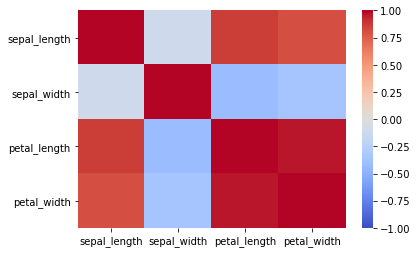

In [24]:
sns.heatmap(
    data = data_reindexed.corr(),
    vmin=-1,
    vmax=1,
    cmap="coolwarm"
)

From the correlation matrix heatmap plot, we observe the following:

* sepal_width and petal_length is relatively inversely correlated
* petal_length and petal_width is strongly correlated

The next step involves looking at distributions. This will help confirm correlation observations as well

The first pairplot is to show correlations

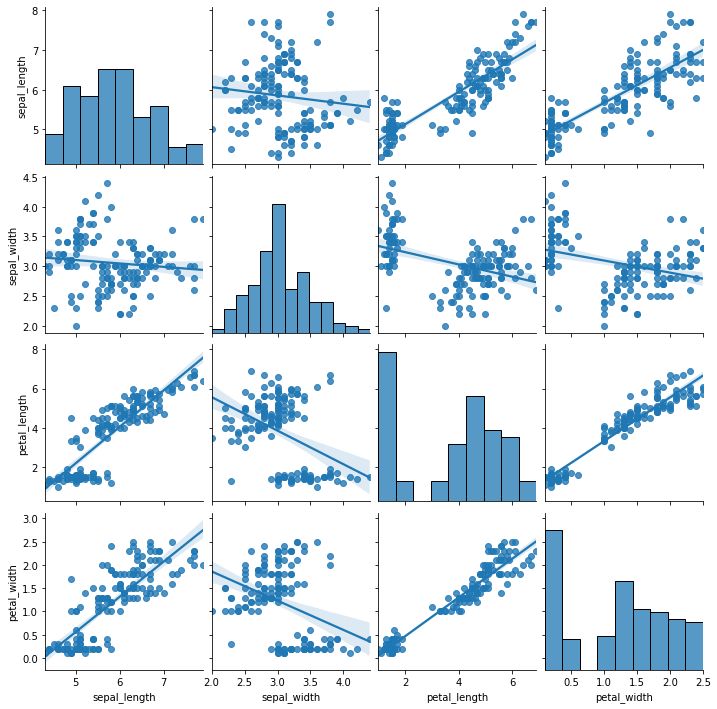

In [25]:
sns.pairplot(data_reindexed, kind="reg")

The second pairplot is to show distributions of features across classes

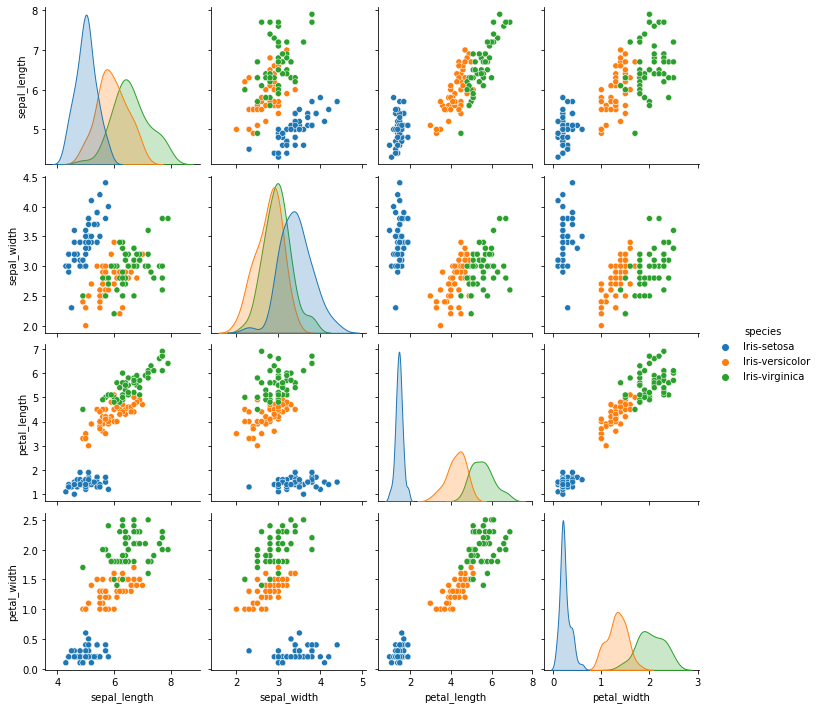

In [26]:
sns.pairplot(data_reindexed, hue="species")

Here we are specifically looking for the following:

* In the KDE (kernel density estimate) plot (the diagonal), there has to be clear separation of classes for the machine to be able to distinguish between features
* This should be emphasised by the scatterplot which should show groupings of plots for different classes
* Although there might be some overlap, the distinction should be clear

### Mining

This dataset is too simple and too small to do data mining on, so we are going to skip this step. However, some data mining techniques include:

* K-Means
* K-Nearest Neighbours (KNN)
* Decision Trees


## Modeling

Before we start building a model, we have to think about the problem at hand and the type of problem that we are trying to solve.

So remember, this is a **classification** problem where we are trying to classify the Iris flowers according to species.

* How many classes do we have? 3
  * If we have 2 classes: then we tackle this as a binary classification problem. For this we need 1 output node
  * If we have > 2 classes: then we tackle this as a sparse categorical classification problem. For this we need C output classes, where C = number of classes
  
* For binary classification problems:
  * Loss function: binary_crossentropy
  * Last layer: Dense (sigmoid)
  * Optimisation algorithm: RMSProp/Adam
  * Metrics: Loss, Accuracy, True Positives, True Negatives, False Positives, False Negatives, Precision, Recall, ROC/AUC
* For sparse categorical classification problems:
  * Loss function: sparse_categorical_crossentropy
  * Last layer: Dense (softmax)
  * Optimisation algorithm: RMSProp/Adam
  * Metrics: Loss, Accuracy
  
**Cross Entropy:** <br>
"In information theory, the cross entropy between two probability distributions `p` and `q` over the same underlying set of events measures the average number of bits needed to identify an event drawn from the set if a coding scheme used for the set is optimized for an estimated probability distribution `q`, rather than the true distribution `p`."

...In short, it measures the information loss

[https://en.wikipedia.org/wiki/Cross_entropy](https://en.wikipedia.org/wiki/Cross_entropy)

### Data pipeline

Technically at this step you need to build data pipelines to feed data from the real world into a readable format for the NN. However, this is an extremely delicate and tedious process, so we will be skipping this step for today.

**Hint:**

THIS is where the value lies. You don't have a production system without a data pipeline.

We will be doing the very minimum in data manipulation, but this is NOT a data pipeline.

We are going to:

1. Encode the data
2.~Cater for class imbalance~
3. Shuffle the data
4. Split the training, validation and testing data

#### Encode the data

Let's look at the types again

In [27]:
all_data = data_reindexed.copy()
all_data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

We need to encode the species column as a numerical value. This can be done as follows

In [28]:
all_data['species'] = pd.Categorical(all_data['species'])
all_data['species'] = all_data['species'].cat.codes
all_data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species            int8
dtype: object

Let's confirm the class values

In [29]:
all_data['species'].nunique()

3

In [30]:
all_data['species'].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

As we can see, there are equal amounts of records per class, so there is no need to cater for class imbalance

#### Shuffle the data

In [31]:

all_data = all_data.sample(frac=1) # Randomly sample 100% of the data
all_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
139,6.9,3.1,5.4,2.1,2
48,5.3,3.7,1.5,0.2,0
107,7.3,2.9,6.3,1.8,2
16,5.4,3.9,1.3,0.4,0
31,5.4,3.4,1.5,0.4,0


You can see from the id's that the data has been shuffled

#### Split train and test sets

First, lets split the features (x) and the label (y)

In [32]:
y = all_data[[LABEL_CLASS]].values
x = all_data.drop([LABEL_CLASS], axis=1).values

print("x.shape: {}".format(x.shape))
print("y.shape: {}".format(y.shape))

x.shape: (150, 4)
y.shape: (150, 1)


So here we can see, for both x and y, we have 150 rows. 
X represents 4 features and y represents 1 class.

Let's now split the training and testing sets

In [33]:
TEST_SET_SIZE = 0.1
VALIDATION_SET_SIZE = 0.2

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=TEST_SET_SIZE)
train_x, validation_x, train_y, validation_y = train_test_split(train_x, train_y, test_size=VALIDATION_SET_SIZE)

print('Original x: {}, y: {}'.format(x.shape[0], y.shape[0]))
print('Train x: {}, y: {}'.format(train_x.shape[0], train_y.shape[0]))
print('Validation x: {}, y: {}'.format(validation_x.shape[0], validation_y.shape[0]))
print('Test x: {}, y: {}'.format(test_x.shape[0], test_y.shape[0]))

Original x: 150, y: 150
Train x: 108, y: 108
Validation x: 27, y: 27
Test x: 15, y: 15


### Model building

This is the fun part....

Let's define some parameters:

In [69]:
INPUT_DIMENSIONS = len(FEATURE_NAMES)
OUTPUT_DIMENSIONS = len(LABEL_NAMES)

print("INPUT_DIMENSIONS: {}".format(INPUT_DIMENSIONS))
print("OUTPUT_DIMENSIONS: {}".format(OUTPUT_DIMENSIONS))

INPUT_DIMENSIONS: 4
OUTPUT_DIMENSIONS: 3


We are going to start off with a very simple model with:

* 4 input nodes
* 3 output nodes

(No hidden nodes)

In [70]:
model = tf.keras.Sequential()

# Input
model.add(tf.keras.layers.Input(shape=(INPUT_DIMENSIONS)))

# Hidden
# model.add(tf.keras.layers.Dense(3))  
# model.add(tf.keras.layers.Activation(activation='sigmoid'))

# Output
model.add(tf.keras.layers.Dense(OUTPUT_DIMENSIONS))  
model.add(tf.keras.layers.Activation(activation='sigmoid'))

# Summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 3)                 15        
_________________________________________________________________
activation_4 (Activation)    (None, 3)                 0         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


Now let's define the learning method. For now, we are going to use:

* Optimisation algorithm: adam
* Loss function: sparse_categorical_crossentropy
* Metrics: Accuracy (for sparse categorical classification)

In [53]:
LEARNING_RATE = 1e-3
METRICS = [
  tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy'),
]

model.compile(optimizer=tf.keras.optimizers.Adam(LEARNING_RATE), loss='sparse_categorical_crossentropy', metrics=METRICS)

### Training

Let's save our training output. For this, we clear a directory and create a checkpoint callback

In [66]:
!rm -rf training
!ls -als

total 24
4 drwxr-xr-x 1 root root 4096 Mar  9 10:03 .
4 drwxr-xr-x 1 root root 4096 Mar  9 09:04 ..
4 drwxr-xr-x 4 root root 4096 Mar  5 14:36 .config
8 -rw-r--r-- 1 root root 4617 Mar  9 09:17 iris.csv
4 drwxr-xr-x 1 root root 4096 Mar  5 14:37 sample_data


In [67]:
CHECKPOINT_PATH = "training/cp-{epoch:04d}.ckpt"
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(filepath=CHECKPOINT_PATH, save_weights_only=True, verbose=1)

Now, let the training begin. For now we are going to:

* Train the algorithm for 20 epochs
* Batch the data into 5 rows per batch
* Validate on validation data
* Shuffle training data (batch data) as they come in


**IMPORTANT**

If you want to retrain your model, you need to compile it again. So run the cells above again.

In [68]:
EPOCHS = 200
BATCH_SIZE = 5

train_history = model.fit(
  train_x,
  train_y,
  validation_data=(validation_x, validation_y),
  epochs=EPOCHS,
  batch_size=BATCH_SIZE,
  shuffle=True,
  callbacks=[
    checkpoint_cb
  ]
)

Epoch 1/200
22/22 [==============================] - 0s 7ms/step - loss: 0.2230 - accuracy: 0.9444 - val_loss: 0.1491 - val_accuracy: 1.0000

Epoch 00001: saving model to training/cp-0001.ckpt
Epoch 2/200
22/22 [==============================] - 0s 5ms/step - loss: 0.2228 - accuracy: 0.9537 - val_loss: 0.1497 - val_accuracy: 1.0000

Epoch 00002: saving model to training/cp-0002.ckpt
Epoch 3/200
22/22 [==============================] - 0s 4ms/step - loss: 0.2227 - accuracy: 0.9537 - val_loss: 0.1483 - val_accuracy: 1.0000

Epoch 00003: saving model to training/cp-0003.ckpt
Epoch 4/200
22/22 [==============================] - 0s 5ms/step - loss: 0.2217 - accuracy: 0.9444 - val_loss: 0.1481 - val_accuracy: 1.0000

Epoch 00004: saving model to training/cp-0004.ckpt
Epoch 5/200
22/22 [==============================] - 0s 4ms/step - loss: 0.2216 - accuracy: 0.9444 - val_loss: 0.1484 - val_accuracy: 1.0000

Epoch 00005: saving model to training/cp-0005.ckpt
Epoch 6/200
22/22 [================

AS you can see, this is not nearly good enough. We shall now start tinkering. But first, let us continue.

In [58]:
!ls -als

total 44
 4 drwxr-xr-x 1 root root  4096 Mar  9 10:00 .
 4 drwxr-xr-x 1 root root  4096 Mar  9 09:04 ..
 4 drwxr-xr-x 4 root root  4096 Mar  5 14:36 .config
 8 -rw-r--r-- 1 root root  4617 Mar  9 09:17 iris.csv
 4 drwxr-xr-x 1 root root  4096 Mar  5 14:37 sample_data
20 drwxr-xr-x 2 root root 20480 Mar  9 10:00 training


Here we can see a training directory has been created that saved our training "progress". Let us now take a look at the training history.

In [59]:
history = train_history.history

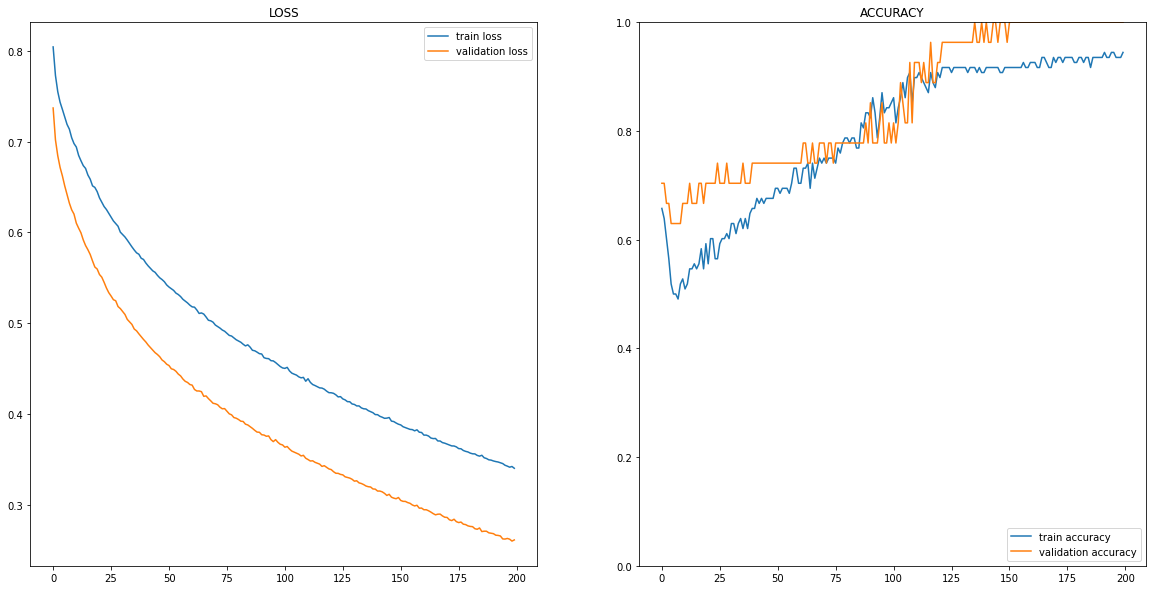

In [60]:
fig = plt.figure(figsize=(20, 10))

# LOSS
ax = plt.subplot(1,2,1)
ax.set_title('LOSS')
ax.plot(history['loss'], label="train loss")
ax.plot(history['val_loss'], label="validation loss")
ax.legend(loc="upper right")

# ACCURACY
ax = plt.subplot(1,2,2)
ax.set_title('ACCURACY')
ax.plot(history['accuracy'], label="train accuracy")
ax.plot(history['val_accuracy'], label="validation accuracy")
ax.legend(loc="lower right")
ax.set_ylim([0, 1])

plt.show()

### Validation

We are going to skip this steps as we do not need to cross validate hyper parameters or anything similar.

### Testing

We run the evaluation of the model on the test data, which was not exposed to the NN during training

In [61]:
evaluation_results = model.evaluate(test_x, test_y, batch_size=BATCH_SIZE)

for name, value in zip(model.metrics_names, evaluation_results):
  print(name, ': ', value)
print()

3/3 [==============================] - 0s 5ms/step - loss: 0.2662 - accuracy: 1.0000
loss :  0.2662257254123688
accuracy :  1.0



## Insights

Let's make some predictions

In [ ]:
predictions = model.predict(test_x)

for i in range(0, len(test_x)):
  ground_truth = test_y[i]
  prediction = np.argmax(predictions[i])
  correct = True if prediction == ground_truth else False
  print("Ground Truth: {}\t Prediction: {} => \tCorrect: {}".format(ground_truth, prediction, correct))

## Presentation

Skipping, as this is just a tutorial